In [1]:
# importing tkinter module
import tkinter as tk
from tkinter import *
from tkinter import ttk
from PIL import ImageTk, Image
import sys

import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

import pandas as pd
import pandastable as pt
from pandastable import Table, TableModel, config

import webbrowser

import numpy as np

global Null
Null = np.nan

In [2]:
#importing data from smartsheet
import smartsheet
#Reading a smartsheet 
sheet_id = 7523406343104388
ss = smartsheet.Smartsheet('GHwvGA29rHRE418p3YNLSUTEw6D43rSW6neIm')
sheet = ss.Sheets.get_sheet(sheet_id)
rows = sheet.rows
columns = sheet.columns
#Creating a dataframe for col in columns, adding rows
df = pd.DataFrame(columns=[col.title for col in columns])
for row in rows:
    df = df.append({col.title:row.get_column(col.id).display_value for col in columns},ignore_index=True)
    

#Reading a smartsheet 'AEM FSE Costa Rica Resource Project Plan ww50'
Sheet_ID = 808559307974532
ss = smartsheet.Smartsheet('GHwvGA29rHRE418p3YNLSUTEw6D43rSW6neIm')
sheet1 = ss.Sheets.get_sheet(Sheet_ID)
rows = sheet1.rows
#Creatin a dataframe
Project_Plan = pd.DataFrame(columns=['Number','Tool Type','PO','Intel ID','Site','Mode','Start WW','End WW','HC Needed'])
for row in rows:
    Project_Plan = Project_Plan.append({'Number':row.cells[0].value,'Tool Type':row.cells[1].value,'PO':row.cells[2].value,'Intel ID':row.cells[3].value,'Site':row.cells[4].value,'Mode':row.cells[5].value,'Start WW':row.cells[6].value,'End WW':row.cells[7].value,'HC Needed':row.cells[8].value},ignore_index=True)
    
#Dropping first column
Project_Plan = Project_Plan.drop(['Number'], axis=1)
#Dropping last two rows
Project_Plan = Project_Plan.drop(Project_Plan.index[[-1,-2]])

#Columm HC Needed to int
Project_Plan['HC Needed'] = Project_Plan['HC Needed'].astype(int)

#Dropping PO column
Project_Plan = Project_Plan.drop(['PO'], axis=1)





C:\Users\PaoloFernandez\AppData\Local\Temp\ipykernel_22428\1419793045.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({col.title:row.get_column(col.id).display_value for col in columns},ignore_index=True)
C:\Users\PaoloFernandez\AppData\Local\Temp\ipykernel_22428\1419793045.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({col.title:row.get_column(col.id).display_value for col in columns},ignore_index=True)
C:\Users\PaoloFernandez\AppData\Local\Temp\ipykernel_22428\1419793045.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({col.title:row.get_column(col.id).display_value for col in columns},ignore_index=True)
C:\Users\PaoloFernandez\AppData\Local\Temp\ipykernel_22428

In [3]:
sheet_id = 1998891726989188
ss = smartsheet.Smartsheet('GHwvGA29rHRE418p3YNLSUTEw6D43rSW6neIm')
sheet = ss.Sheets.get_sheet(sheet_id)
rows = sheet.rows
columns = sheet.columns
df1 = pd.DataFrame(columns=[col.title for col in columns])
for row in rows:
    df1.loc[row.id] = [col.value for col in row.cells]

In [4]:
#loc by Site = CRML
df2 = df1.loc[df1['Site'] == 'CRML']
df2

,AEM ID,Intel ID,Site,Start WW,Start Week,End WW,End Week,HC Plan,WW1,WW2,...,WW44,WW45,WW46,WW47,WW48,WW49,WW50,WW51,WW52,WW53
4247401184880516,HSTx10,HMX01,CRML,2023-06-12,24.0,2023-06-30,26.0,5.0,None,None,...,None,None,None,None,None,None,None,None,None,None
4385867585677188,HBI DC,DBC002,CRML,2023-03-13,11.0,2023-03-13,11.0,2.0,None,None,...,None,None,None,None,None,None,None,None,None,None


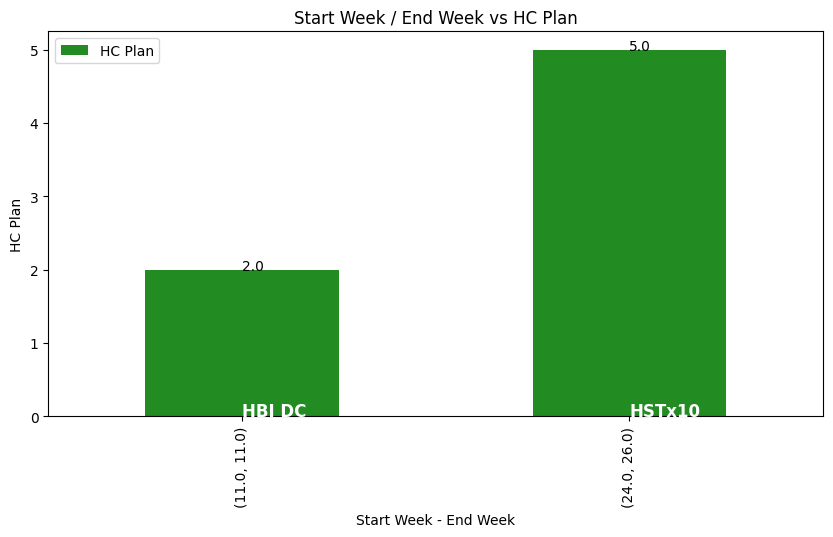

In [5]:
#bar plot Start Week vs HC Plan
df2.groupby(['Start Week','End Week'])['HC Plan'].sum().plot(kind='bar', figsize=(10,5), color='forestgreen')
plt.title('Start Week / End Week vs HC Plan')
plt.xlabel('Start Week - End Week')
plt.ylabel('HC Plan')
#Legend for the bars, should be AEM ID
plt.legend()
#Labels on the bars
for index, value in enumerate(df2.groupby(['Start Week','End Week'])['HC Plan'].sum()):
    plt.text(index, value, str(value))
#Add text on top of the bars, the text should be AEM ID
plt.text(0, 0, 'HBI DC', fontsize=12, color='white', fontweight='bold') #BY hand
plt.text(1, 0, 'HSTx10', fontsize=12, color='white', fontweight='bold') #By hand
plt.show()

In [6]:
#loc by Site = CRAT
df3 = df1.loc[df1['Site'] == 'CRAT']

In [7]:
#This function will deepen on the America/EU button
def my_open():
    root_child = Toplevel(root)  # Child window
    root_child.attributes('-fullscreen', True)
    root_child.title("Sites in the America/European Union")
    root_child.configure(bg='white')

    label2 = Label(root_child, text="AEM America/European Union Resource and Project Plan", bg="white", font=("Segoe UI", 20))
    label2.place(x=500, y=50)


#Adding an image 
    image1 = Image.open(r"C:\Users\PaoloFernandez\Documents\Work Stuff\FAE\UvsHC CR.png")
    image1 = image1.resize((1200, 500), Image.Resampling.LANCZOS)
    test = ImageTk.PhotoImage(image1)
    label1 = tk.Label(root_child,image=test)
    label1.image = test
    #Showing labels on the center of the screen
    label1.place(x=150, y=150)
    label1.config(borderwidth=10, relief="groove", bg="green")

#Adding a button to close child window
    button1 = Button(root_child, text="USA",bg="darkgrey", height=5, width=20, command=my_open10)
    button2 = Button(root_child, text="Costa Rica",bg="darkgrey", height=5, width=20, command=my_open2)
    button3 = Button(root_child, text="European Union",bg="darkgrey", height=5, width=20)
    button4 = Button(root_child, text="Back", command=root_child.destroy, height=5, width=20)

    #Adding an exit button that will close the program
    button5 = Button(root_child, text="Exit", command=root.destroy, height=5, width=20)
    button5.place(x=1380, y=550)

    button1.place(x=1380, y=150)
    button2.place(x=1380, y=250)
    button3.place(x=1380, y=350)
    button4.place(x=1380, y=450)
    

#This function will deepen on the Costa Rica button
def my_open2():
    root_child = Toplevel(root)  # Child window
    root_child.attributes('-fullscreen', True)
    root_child.title("Sites in Costa Rica")
    root_child.configure(bg='white')

    label2 = Label(root_child, text="AEM Costa Rica Resource and Project Plan", bg="white", font=("Segoe UI", 20))
    label2.place(x=500, y=50)


    #Adding an graph
    sheet_id = 1998891726989188
    ss = smartsheet.Smartsheet('GHwvGA29rHRE418p3YNLSUTEw6D43rSW6neIm')
    sheet = ss.Sheets.get_sheet(sheet_id)
    rows = sheet.rows
    columns = sheet.columns
    df1 = pd.DataFrame(columns=[col.title for col in columns])
    for row in rows:
        df1.loc[row.id] = [col.value for col in row.cells]
    df1.drop(df1.columns[0], axis=1, inplace=True)
    df1.reset_index(drop=True, inplace=True)
    df1 = df1.loc[41:42]
    df1.drop(df1.columns[0:7], axis=1, inplace=True)
    fig, ax = plt.subplots()
    #size of the graph
    fig.set_size_inches(10, 5)
    df1.iloc[1].plot(kind='line', color='lightcoral', linewidth=2, ax=ax)
    df1.iloc[0].plot(kind='bar',color='forestgreen', linewidth=1, ax=ax)
    ax.set_xlabel('Work Week')
    ax.set_ylabel('Count')
    ax.legend(['Total HC Available', 'Total HC Needed'], loc='upper right')
    #Adding red labels to the bars
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),rotation=270)
    
    #Adding labels to the line graph
    for i, v in enumerate(df1.iloc[1]):
        ax.text(i, v, str(v), color='firebrick', fontweight='bold', rotation=270)
        
        
    
    #Changing background color
    ax.set_facecolor('white')
    #Changing grid color
    ax.grid(color='forestgreen', linestyle='-', linewidth=0.25, alpha=0.5)
    
    #Changing grid color
    ax.grid(color='forestgreen', linestyle='-', linewidth=0.25, alpha=0.5)

    #Adding highligted line surrounding the graph
    ax.spines['top'].set_color('forestgreen')
    ax.spines['bottom'].set_color('forestgreen')
    ax.spines['left'].set_color('forestgreen')
    ax.spines['right'].set_color('forestgreen')
    ax.tick_params(axis='x', colors='forestgreen')
    ax.tick_params(axis='y', colors='forestgreen')
    ax.yaxis.label.set_color('forestgreen')
    ax.xaxis.label.set_color('forestgreen')
    ax.title.set_color('forestgreen')
    plt.xticks(rotation=90)

    # Save the figure to a file and load it as a PhotoImage
    fig.savefig("graph.png")
    img = PhotoImage(file="graph.png")


    # Create a button with the graph image as the background
    button0 = Button(root_child, text="Graph", image=img, command=graph_cr)
    button0.image = img
    button0.place(x=150, y=150)
    button0.config(borderwidth=10, relief="groove", bg="green")

    button10 = Button(root_child, text="HC",bg="darkgrey", height=5, width=20, command=my_open4)
    button1 = Button(root_child, text="CRAT",bg="darkgrey", height=5, width=20, command=my_open3)
    button2 = Button(root_child, text="CRVLE",bg="darkgrey", height=5, width=20, command=my_open8)
    button3 = Button(root_child, text="Plan",bg="darkgrey", height=5, width=20, command=my_open11)
    button4 = Button(root_child, text="Training", command=training_cr, height=5, width=20)
    button5 = Button(root_child, text="Back", command=root_child.destroy, height=5, width=20)
    button6 = Button(root_child, text="Exit", command=root.destroy, height=5, width=20)

    button10.place(x=1380, y=90)
    button1.place(x=1380, y=190)
    button2.place(x=1380, y=290)
    button3.place(x=1380, y=390)
    button4.place(x=1380, y=490)
    button5.place(x=1380, y=590)
    button6.place(x=1380, y=690)



#This function will deepen on the CRAT button
def my_open3():
    root_child = Toplevel(root)  # Child window
    root_child.attributes('-fullscreen', True)
    root_child.title("CRAT")
    root_child.configure(bg='white')

    label2 = Label(root_child, text="AEM CRAT Resource and Project Plan", bg="white", font=("Segoe UI", 20))
    label2.place(x=500, y=50)

    #Adding an image 
    image1 = Image.open(r"C:\Users\PaoloFernandez\Documents\Work Stuff\FAE\UvsHC CR.png")
    image1 = image1.resize((1200, 500), Image.Resampling.LANCZOS)
    test = ImageTk.PhotoImage(image1)
    label1 = tk.Label(root_child,image=test)
    label1.image = test
    #Showing labels on the center of the screen
    label1.place(x=150, y=150)
    label1.config(borderwidth=10, relief="groove", bg="green")

    button1 = Button(root_child, text="SQ",bg="darkgrey", height=5, width=20, command=my_open5)
    button2 = Button(root_child, text="Upgrade",bg="darkgrey", height=5, width=20)
    button4 = Button(root_child, text="Back", command=root_child.destroy, height=5, width=20)
    button5 = Button(root_child, text="WS", height=5, width=20, bg="darkgrey")

    #Adding an exit button that will close the program
    button6 = Button(root_child, text="Exit", command=root.destroy, height=5, width=20)
    button6.place(x=1380, y=625)

    


    button1.place(x=1380, y=125)
    button2.place(x=1380, y=225)
    button4.place(x=1380, y=325)
    button5.place(x=1380, y=425)


    #This function will deepen on the HC button
def my_open4():    

    frame = Toplevel(root)
    table = Table(frame, dataframe=df, showstatusbar=True)
    table.show()
    #Adding text to the frame

#When clicked, edit will redirect to a webpage
def my_open6():
    webbrowser.open_new(r"https://www.smartsheet.com/")
    root_child = Toplevel(root)  # Child window
    root_child.attributes('-fullscreen', True)
        

    #This function will deepen on the SQ button
def my_open5():
    global CRAT
    root_child = Toplevel(root)  # Child window
    root_child.attributes('-fullscreen', True)
    root_child.title("SQ")
    root_child.configure(bg='white')

    label2 = Label(root_child, text="AEM CRAT SQ Resource and Project Plan", bg="white", font=("Segoe UI", 20))
    label2.place(x=500, y=50)


    figure = plt.Figure(figsize=(12,10), dpi=100)
    ax = figure.add_subplot(111)
    chart_type = FigureCanvasTkAgg(figure, root_child)
    chart_type.get_tk_widget().pack()
    CRAT1 = CRAT.groupby('Start WW')['Tool Type'].value_counts().unstack()
    CRAT1.plot(kind='bar', legend=True, ax=ax,stacked=True,width=0.8)
    #Adding labels to the bars
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    ax.set_title('CRAT Tool Type by Start WW')
    


    button1 = Button(root_child, text="Back", command=root_child.destroy, height=5, width=20)
    button1.place(x=1380, y=550)
 
    #Adding an exit button that will close the program
    button3 = Button(root_child, text="Exit", command=root.destroy, height=5, width=20)
    button3.place(x=1380, y=650)
    
    #This function will deepen on the Power BI button
def my_open7():
    #opening an url
    webbrowser.open_new(r"https://app.powerbi.com/groups/me/reports/ebee5fac-18b0-431a-a65d-5d711c601410/ReportSection?ctid=bb6932c3-0188-4356-b8a6-8db265bf6b74")

#This function will deepen on the CRLVE button
def my_open8():
    global CRML
    root_child = Toplevel(root)  # Child window
    root_child.attributes('-fullscreen', True)
    root_child.title("CRVLE")
    root_child.configure(bg='white')

    label2 = Label(root_child, text="AEM CRVLE Resource and Project Plan", bg="white", font=("Segoe UI", 20))
    label2.place(x=500, y=50)

    #Adding an image 
    image1 = Image.open(r"C:\Users\PaoloFernandez\Documents\Work Stuff\FAE\UvsHC CR.png")
    image1 = image1.resize((1200, 500), Image.Resampling.LANCZOS)
    test = ImageTk.PhotoImage(image1)
    label1 = tk.Label(root_child,image=test)
    label1.image = test
    #Showing labels on the center of the screen
    label1.place(x=150, y=150)
    label1.config(borderwidth=10, relief="groove", bg="green")

    button1 = Button(root_child, text="SQ",bg="darkgrey", height=5, width=20, command=my_open9)
    button2 = Button(root_child, text="Upgrade",bg="darkgrey", height=5, width=20)
    button4 = Button(root_child, text="Back", command=root_child.destroy, height=5, width=20)
    button5 = Button(root_child, text="WS", height=5, width=20, bg="darkgrey")

    #Adding an exit button that will close the program
    button6 = Button(root_child, text="Exit", command=root.destroy, height=5, width=20)
    button6.place(x=1380, y=625)

    


    button1.place(x=1380, y=125)
    button2.place(x=1380, y=225)
    button5.place(x=1380, y=325)
    button4.place(x=1380, y=425)

    #This function will deepen on the SQ button on the CRVLE page
def my_open9():
    global CRML
    root_child = Toplevel(root)  # Child window
    root_child.attributes('-fullscreen', True)
    root_child.title("SQ")
    root_child.configure(bg='white')

    label2 = Label(root_child, text="AEM CRVLE SQ Resource and Project Plan", bg="white", font=("Segoe UI", 20))
    label2.place(x=500, y=50)

    figure = plt.Figure(figsize=(12,10), dpi=100)
    ax = figure.add_subplot(111)
    chart_type = FigureCanvasTkAgg(figure, root_child)
    chart_type.get_tk_widget().pack()
    CRML1 = CRML.groupby('Start WW')['Tool Type'].value_counts().unstack()
    CRML1.plot(kind='bar', legend=True, ax=ax,stacked=True,width=0.8)
    #Adding labels to the bars
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    ax.set_title('CRLVE Tool Type by Start WW')


    button1 = Button(root_child, text="Back", command=root_child.destroy, height=5, width=20)
    button1.place(x=1380, y=550)
 
    #Adding an exit button that will close the program
    button3 = Button(root_child, text="Exit", command=root.destroy, height=5, width=20)
    button3.place(x=1380, y=650)

    #Add new SQ button
    button4 = Button(root_child, text="New SQ", height=5, width=20, bg="darkgrey", command=new_sq_crvle)
    #Add Modify SQ button
    button5 = Button(root_child, text="Modify SQ", height=5, width=20, bg="darkgrey")

    button4.place(x=1380, y=125)
    button5.place(x=1380, y=225)

#This function will deepen on the USA button
def my_open10():
    global USA
    root_child = Toplevel(root)  # Child window
    root_child.attributes('-fullscreen', True)
    root_child.title("USA")
    root_child.configure(bg='white')

    label2 = Label(root_child, text="AEM USA Resource and Project Plan", bg="white", font=("Segoe UI", 20))
    label2.place(x=500, y=50)

    #Adding an image 
    image1 = Image.open(r"C:\Users\PaoloFernandez\Documents\Work Stuff\FAE\Global Operations.png")
    image1 = image1.resize((1200, 500), Image.Resampling.LANCZOS)
    test = ImageTk.PhotoImage(image1)
    label1 = tk.Label(root_child,image=test)
    label1.image = test
    #Showing labels on the center of the screen
    label1.place(x=150, y=150)
    label1.config(borderwidth=10, relief="groove", bg="green")

    button1 = Button(root_child, text="RA",bg="darkgrey", height=3, width=20)
    button2 = Button(root_child, text="FM",bg="darkgrey", height=3, width=20)
    button3 = Button(root_child, text="JF",bg="darkgrey", height=3, width=20)
    button4 = Button(root_child, text="Back", command=root_child.destroy, height=3, width=20)
    button5 = Button(root_child, text="SC", height=3, width=20, bg="darkgrey")
    button6 = Button(root_child, text="SJ", height=3, width=20, bg="darkgrey")
    button7 = Button(root_child, text="AN", height=3, width=20, bg="darkgrey")
    button8 = Button(root_child, text="HF1", height=3, width=20, bg="darkgrey")
    button9 = Button(root_child, text="HF2", height=3, width=20, bg="darkgrey")
    button10 = Button(root_child, text="CH", height=3, width=20, bg="darkgrey")

    #Adding an exit button that will close the program
    button11 = Button(root_child, text="Exit", command=root.destroy, height=3, width=20)
    button11.place(x=1380, y=625)

    
#Centering all the buttons on the right side of the screen
    button1.place(x=1380, y=50)
    button2.place(x=1380, y=125)
    button3.place(x=1380, y=200)
    button4.place(x=1380, y=725)
    button5.place(x=1380, y=275)
    button6.place(x=1380, y=350)
    button7.place(x=1380, y=425)
    button8.place(x=1380, y=500)
    button9.place(x=1380, y=575)
    button10.place(x=1380, y=650)
    button11.place(x=1380, y=800)


def my_open11():
    sheet_id = 7523406343104388
    ss = smartsheet.Smartsheet('GHwvGA29rHRE418p3YNLSUTEw6D43rSW6neIm')
    sheet = ss.Sheets.get_sheet(sheet_id)
    rows = sheet.rows
    columns = sheet.columns

    # Creating a list of columns for the Treeview
    columns_list = [col.title for col in columns]

    # Creating a list of data for the Treeview
    data_list = []
    for row in rows:
        data_list.append([col.value for col in row.cells])

    # Creating a Treeview
    frame = Toplevel(root)
    tree = ttk.Treeview(frame, columns=columns_list, show='headings')

    # Adding columns to the Treeview
    for col in columns_list:
        tree.heading(col, text=col)

    # Adding data to the Treeview
    for i, data in enumerate(data_list):
        if any("paolo" in str(cell).lower() for cell in data):
            # Apply custom tag to rows that contain "Paolo" in any cell
            tree.insert('', 'end', values=data, tags=('custom_tag',))
        else:
            tree.insert('', 'end', values=data)

    # Create custom tag and set its style
    tree.tag_configure('custom_tag', background='forestgreen')

    # Setting the Treeview to show rows as rectangles
    style = ttk.Style()
    style.configure('Treeview', rowheight=60, background='white', foreground='black', bordercolor='black', borderwidth=5,
                    relief='solid')
    style.map('Treeview', background=[('selected', 'blue')])

    # Adding scrollbars to the Treeview
    xscrollbar = ttk.Scrollbar(frame, orient='horizontal', command=tree.xview)
    xscrollbar.pack(side='bottom', fill='x')
    yscrollbar = ttk.Scrollbar(frame, orient='vertical', command=tree.yview)
    yscrollbar.pack(side='right', fill='y')
    tree.configure(xscrollcommand=xscrollbar.set, yscrollcommand=yscrollbar.set)

    # Pack the Treeview
    tree.pack(fill='both', expand=True)





# Declare the df variable as a global variable
df = None

#This function will deepen on the New SQ button on Costa Rica page, which will show a table from smartsheet
def new_sq_crvle():
    global df # Reference the global df variable
    sheet_id = 3839061875025796
    ss = smartsheet.Smartsheet('GHwvGA29rHRE418p3YNLSUTEw6D43rSW6neIm')
    sheet = ss.Sheets.get_sheet(sheet_id)
    rows = sheet.rows
    columns = sheet.columns
    #Creating a dataframe from the sheet
    df = pd.DataFrame(columns=[col.title for col in columns])
    for row in rows:
        df.loc[row.id] = [col.value for col in row.cells]
    frame = Toplevel(root)
    table2 = Table(frame, dataframe=df, read_only=False)
    table2.show()
    
    # Code to update the original sheet with the changes made to the table
    def save_changes():
        for i, row in df.iterrows():
            cells = [smartsheet.models.Cell(columnId=col.id, value=value) for col, value in zip(columns, row)]
            ss.Sheets.update_row(sheet.id, smartsheet.models.Row(cells=cells, id=i))
            
    # Code to discard the changes made to the table and close the frame
    def discard_changes():
        frame.destroy()

    save_button = tk.Button(frame, text="Save", command=save_changes)
    save_button.place(x=1380, y=600)
    discard_button = tk.Button(frame, text="Discard", command=discard_changes)
    discard_button.place(x=1380, y=800)

#This function will deepen on the New Training button on Costa Rica page, which will show a table from smartsheet
def training_cr():
    global df # Reference the global df variable
    sheet_id = 4139205417822084
    ss = smartsheet.Smartsheet('GHwvGA29rHRE418p3YNLSUTEw6D43rSW6neIm')
    sheet = ss.Sheets.get_sheet(sheet_id)
    rows = sheet.rows
    columns = sheet.columns
    #Creating a dataframe from the sheet
    df = pd.DataFrame(columns=[col.title for col in columns])
    for row in rows:
        df.loc[row.id] = [col.value for col in row.cells]
    frame = Toplevel(root)
    table2 = Table(frame, dataframe=df,enable_menus=True)
    table2.show()


def graph_cr():
    root_child = tk.Toplevel(root)  # Child window
    root_child.title("Q1, Q2, Q3, Q4")
    root_child.configure(bg='white')

    sheet_id = 1998891726989188
    ss = smartsheet.Smartsheet('GHwvGA29rHRE418p3YNLSUTEw6D43rSW6neIm')
    sheet = ss.Sheets.get_sheet(sheet_id)
    rows = sheet.rows
    columns = sheet.columns
    df1 = pd.DataFrame(columns=[col.title for col in columns])
    for row in rows:
        df1.loc[row.id] = [col.value for col in row.cells]
    df1.drop(df1.columns[0], axis=1, inplace=True)
    df1.reset_index(drop=True, inplace=True)
    df1.drop(df1.columns[0:7], axis=1, inplace=True)
    df1.reset_index(drop=True, inplace=True)
    Q1 = df1.iloc[:, :13]
    Q2 = df1.iloc[:, 13:26]
    Q3 = df1.iloc[:, 26:39]
    Q4 = df1.iloc[:, 39:53]

    Q1 = Q1.loc[41:42]
    Q2 = Q2.loc[41:42]
    Q3 = Q3.loc[41:42]
    Q4 = Q4.loc[41:42]

    fig = plt.Figure(figsize=(10, 8))
    axs = fig.subplots(nrows=2, ncols=2)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)


    ax = axs[0, 0]
    Q1.iloc[1].plot(kind='line', color='lightcoral', linewidth=2, ax=ax)
    Q1.iloc[0].plot(kind='bar',color='forestgreen', linewidth=1, ax=ax)
    #Set title
    ax.set_title('Q1')
    ax.set_xlabel('Work Week')
    ax.set_ylabel('Count')
    ax.legend(['Total HC Available', 'Total HC Needed'], loc='upper right')
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),rotation=270)
    for i, v in enumerate(Q1.iloc[1]):
        ax.text(i, v, str(v), color='firebrick', fontweight='bold', rotation=270)
    ax = axs[0, 1]
    Q2.iloc[1].plot(kind='line', color='lightcoral', linewidth=2, ax=ax)
    Q2.iloc[0].plot(kind='bar',color='forestgreen', linewidth=1, ax=ax)
    ax.set_title('Q2')
    ax.set_xlabel('Work Week')
    ax.set_ylabel('Count')
    ax.legend(['Total HC Available', 'Total HC Needed'], loc='upper right')
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),rotation=270)
    for i, v in enumerate(Q2.iloc[1]):
        ax.text(i, v, str(v), color='firebrick', fontweight='bold', rotation=270)

    ax = axs[1, 0]
    Q3.iloc[1].plot(kind='line', color='lightcoral', linewidth=2, ax=ax)
    Q3.iloc[0].plot(kind='bar',color='forestgreen', linewidth=1, ax=ax)
    ax.set_title('Q3')
    ax.set_xlabel('Work Week')
    ax.set_ylabel('Count')
    ax.legend(['Total HC Available', 'Total HC Needed'], loc='upper right')
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),rotation=270)
    for i, v in enumerate(Q3.iloc[1]):
        ax.text(i, v, str(v), color='firebrick', fontweight='bold', rotation=270)

    ax = axs[1, 1]
    Q4.iloc[1].plot(kind='line', color='lightcoral', linewidth=2, ax=ax)
    Q4.iloc[0].plot(kind='bar',color='forestgreen', linewidth=1, ax=ax)
    ax.set_title('Q4')
    ax.set_xlabel('Work Week')
    ax.set_ylabel('Count')
    ax.legend(['Total HC Available', 'Total HC Needed'], loc='upper right')
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),rotation=270)
    for i, v in enumerate(Q4.iloc[1]):
        ax.text(i, v, str(v), color='firebrick', fontweight='bold', rotation=270)

    canvas = FigureCanvasTkAgg(fig, root_child)
    canvas.get_tk_widget().pack()

    #Creating a button to show plan layout
    button = tk.Button(root_child, text="Show Plan Layout", command=plan_layout,height=3, width=20, bg="darkgrey")
    button.place(x=1380, y=500)
    


   #Function to show plan layout
def plan_layout():
    root_child = tk.Toplevel(root)  # Child window
    root_child.title("Layout")
    root_child.configure(bg='white')

    sheet_id = 1998891726989188
    ss = smartsheet.Smartsheet('GHwvGA29rHRE418p3YNLSUTEw6D43rSW6neIm')
    sheet = ss.Sheets.get_sheet(sheet_id)
    rows = sheet.rows
    columns = sheet.columns
    # Creating a list of columns for the Treeview
    columns_list = [col.title for col in columns]

    df1 = pd.DataFrame(columns=[col.title for col in columns])
    for row in rows:
        df1.loc[row.id] = [col.value for col in row.cells]
    df1.drop(df1.columns[0], axis=1, inplace=True)
    df1.reset_index(drop=True, inplace=True)
    df1.drop(df1.columns[0:7], axis=1, inplace=True)
    #Replacing None with '-'
    df1 = df1.replace(np.nan, '-', regex=True)
    #Deleting last 9 rows
    df1 = df1.drop(df1.index[[-1,-2,-3,-4,-5,-6,-7,-8,-9]])
    #Deleting first row
    df1 = df1.drop(df1.index[0])

    #Creating a treeview
    frame = Toplevel(root)
    tree = ttk.Treeview(frame, columns=columns_list, show='headings')

    #Adding columns to the treeview
    for col in columns_list:
        tree.heading(col, text=col)

    # Creating a list of data for the Treeview
    data_list = []
    for row in rows:
        data_list.append([col.value for col in row.cells])

    #Adding data to the treeview
    for i, data in enumerate(data_list):
        if any("paolo" in str(cell).lower() for cell in data):
            # Apply custom tag to rows that contain "Paolo" in any cell
            tree.insert('', 'end', values=data, tags=('custom_tag',))
        else:
            tree.insert('', 'end', values=data)

    # Create custom tag and set its style
    tree.tag_configure('custom_tag', background='forestgreen')

    # Setting the Treeview to show rows as rectangles
    style = ttk.Style()
    style.configure('Treeview', rowheight=60, background='white', foreground='black', bordercolor='black', borderwidth=5,
                    relief='solid')
    style.map('Treeview', background=[('selected', 'blue')])

    # Adding scrollbars to the Treeview
    xscrollbar = ttk.Scrollbar(frame, orient='horizontal', command=tree.xview)
    xscrollbar.pack(side='bottom', fill='x')
    yscrollbar = ttk.Scrollbar(frame, orient='vertical', command=tree.yview)
    yscrollbar.pack(side='right', fill='y')
    tree.configure(xscrollcommand=xscrollbar.set, yscrollcommand=yscrollbar.set)

    # Pack the Treeview
    tree.pack(fill='both', expand=True)
    





    
    
    
    

In [ ]:
#Assigning both dataframes as global
global CRAT
global CRML
CRAT = Project_Plan.loc[Project_Plan['Site'] == 'CRAT']
CRML = Project_Plan.loc[Project_Plan['Site'] == 'CRML']



In [ ]:
#Function that returns today's date
def today():
    import datetime
    today = datetime.date.today()
    return today

root = tk.Tk()

root.config()

root.configure(bg='white')
#Creating a full screen window
root.attributes('-fullscreen', True)

buttonframe = Frame(root, width = 300, height = 300, bg = "white")

#canvas.pack(side='right', fill="both", expand=True)
buttonframe.pack(side="right", fill="both", expand=False)

#Adding a label on top of the window
label2 = Label(root, text="AEM Global Resource and Project Plan", bg="white", font=("Segoe UI", 20))
label2.place(x=500, y=50)

#Adding label showing text
label3 = Label(root, text="Last Updated On:", bg="white")
label3.place(x=1200, y=800)
#Adding label showing todays date
label3 = Label(root, text=today(), bg="white")
label3.place(x=1300, y=800)

#Adding an image to the canvas
image1 = Image.open(r"C:\Users\PaoloFernandez\Documents\Work Stuff\FAE\Global Operations.png")
image1 = image1.resize((1200, 500), Image.Resampling.LANCZOS)
test = ImageTk.PhotoImage(image1)
label1 = tk.Label(root,image=test)
label1.image = test


#Showing labels on the center of the screen
label1.place(x=150, y=150)

#Adding a green border around label1
label1.config(borderwidth=10, relief="groove", bg="green")



#4 buttons 
button1 = Button(buttonframe, text="America/EU",bg="darkgrey", height=5, width=20, command=my_open)
button2 = Button(buttonframe, text="ACPC",bg="darkgrey", height=5, width=20)
button3 = Button(buttonframe, text="PowerBI",bg="darkgrey", height=5, width=20, command=my_open7)
button4 = Button(buttonframe, text="Exit", command=root.destroy, height=5, width=20)
button5 = Button(root, text="Quarterly",bg='darkgrey', height=5, width=20)
button6 = Button(root, text="Monthly",bg='darkgrey', height=5, width=20)


#Adding buttons to the buttonframe next to the image
button1.place(x=150,y=200)
button2.place(x=150,y=300)
button3.place(x=150,y=400)
button4.place(x=150,y=500)
button5.place(x=550,y=700)
button6.place(x=750,y=700)




root.mainloop()

In [ ]:
#Plotting Start WW unique values and sum of "HC Needed", defining the size of the plot
Project_Plan1 = Project_Plan.groupby(['Start WW'])['HC Needed'].sum().reset_index()
Project_Plan1 = Project_Plan.sort_values(by=['Start WW'])
Project_Plan2 = Project_Plan.reset_index(drop=True)
Project_Plan1 = Project_Plan.rename(columns={'Start WW': 'Start WW', 'HC Needed': 'HC Needed'})
Project_Plan1.plot(x='Start WW', y='HC Needed', kind='bar', figsize=(20, 10), color='green')
#Adding a subline to the plot
plt.axhline(y=df1['FSE'].value_counts().sum(), color='red', linestyle='dashdot')
plt.title('2022 - 2023 CR Planner')
plt.xlabel('Start WW')
plt.ylabel('HC Needed')
plt.show()



**I need a file showing people on site, people on call, people on vacation or taking sickdays**

In [ ]:
import calendar
year = -1
month = 7
print(calendar.month(year, month))